In [230]:
# importing the libraries

# data manipulation
import pandas as pd
import numpy as np

# data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

# About the data

**Survived:** If survived or no (0 = No, 1 = Yes) (Target variables, Numeric)\
**PassengerId:** Unique ID of each passenger (Numeric)\
**Age:** Age in years (Numeric)\
**SibSp:** Number of siblings/spouses aboard the Titanic (Numeric)\
**Parch:** Number of parents/children aboard the Titanic (Numeric)\
**Fare:** Passenger fare (Numeric)\
**Name:** Name of passenger (String)\
**Cabin:** Cabin number (String)\
**Ticket:** Ticket number (String)\
**Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) (String)\
**Sex:** Sex male or female (String)\
**Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Reading in the data

In [231]:
# Reading in the data
train_data = pd.read_csv("F:/MSDS/Data Mining/Programming Assignment 4/train.csv")
test_data = pd.read_csv("F:/MSDS/Data Mining/Programming Assignment 4/test.csv")

# Getting Data Information

In [232]:
# shape of the data
print("The train data contains", train_data.shape[0], "rows and", train_data.shape[1], "columns")
print("The test data contains", test_data.shape[0], "rows and", test_data.shape[1], "columns") 

# Label values if the passenger survived or not is not given in the test data

The train data contains 891 rows and 12 columns
The test data contains 418 rows and 11 columns


In [233]:
# Getting info of the train data
train_data.info()

# There are some missing values in Cabin, Age, and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [234]:
# Getting info of the test data
test_data.info()

# here are some missing values in Cabin, Age, and Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Check for Missing Values

In [235]:
# Check for missing values
print("Missing values in the train data:\n\n", train_data.isnull().sum(), sep = "")
print("\nMissing values in the test data:\n\n", test_data.isnull().sum(), sep = "")

Missing values in the train data:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test data:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Combining the datasets

In [236]:
df = pd.concat([train_data, test_data])
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Generating Visuals

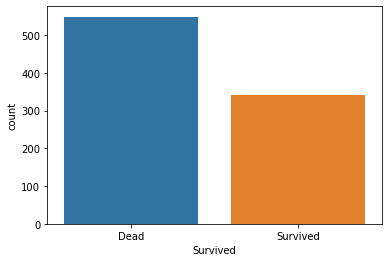

In [237]:
# Distribution of target variable
sns.countplot(x = 'Survived', data = train_data)
plt.xticks([1,0], ['Survived', 'Dead'])
plt.show()

# Death count is higher than Survived

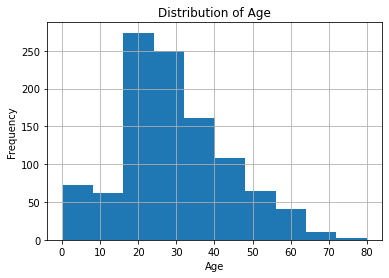

In [238]:
# Disttribution of Age
plt.hist(df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Most of the passengers are aged between 16-32

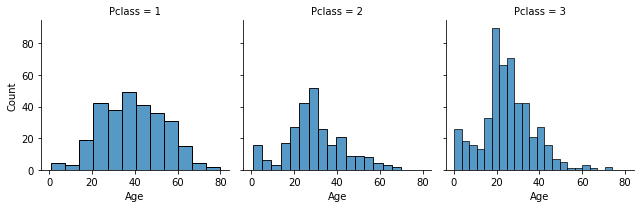

In [239]:
# Distribution of Age by Pclass
g = sns.FacetGrid(df, col = "Pclass")
g.map(sns.histplot, 'Age')

# The younger population is higher in Pclass = 3

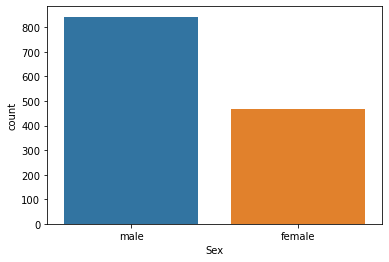

In [240]:
# Distribution of Sex
sns.countplot(x = 'Sex', data = df)
plt.show()

# Male population is higher than female

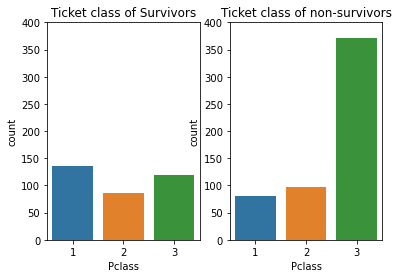

In [241]:
# Plot for ticket class of people who survived
plt.subplot(1, 2, 1)
sns.countplot(x = train_data.loc[train_data['Survived'] == 1, 'Pclass'])
plt.ylim(0,400)
plt.title("Ticket class of Survivors")

# Plot for ticket class of people who could not survive
plt.subplot(1, 2, 2)
sns.countplot(x = train_data.loc[train_data['Survived'] == 0, 'Pclass'])
plt.ylim(0,400)
plt.title("Ticket class of non-survivors")

plt.show()

# Most of the non-survivors are from Pclass = 3

## Add a new variable named FamilySize for some interesting visuals

In [242]:
# Feature engineering

# Add a variable named FamilySize
df['FamilySize'] = 1 + df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


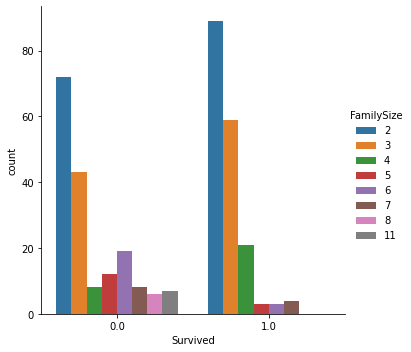

In [243]:
# Family Size and Survival
sns.catplot(x = 'Survived', data = df.loc[(df['FamilySize'] > 1) & (df['Survived'].notnull())], hue = 'FamilySize', kind = 'count')
plt.show() 

# The death count is higher for people with family sizes of 5 or more 
# while survival is more likely when they are alone or family size is 1 to 4

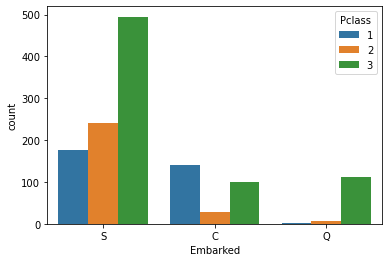

In [244]:
# Plot for Embarked
sns.countplot(x = 'Embarked', data = df, hue = 'Pclass')
plt.show()

# Most passengers embarked on Southampton

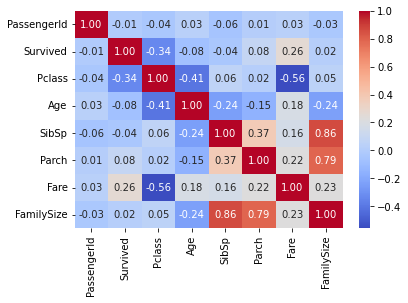

In [245]:
# Creating a correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

# Feature Selection

In [246]:
# Dropping features that are not helpful and have high missing values
df.drop(['Ticket'], axis = 1, inplace = True)
df.drop(['Cabin'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)

# Dealing with Missing Values

In [247]:
# Dealing with missing values

## Age
df['Age'] = df.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

## Fare: It has only one missing value, lets use median of passengers with similar conditions to impute it
print(df[df['Fare'].isnull()])

val_samecases = df.loc[(df['Pclass'] == 3) & (df['Sex'] == 1) & (df['Embarked'] == 'S') & df['FamilySize'] == 1]['Fare'].median()
df.loc[df['Fare'].isnull(), 'Fare'] = val_samecases

      PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked  \
1043         1044       NaN       3  male  60.5      0      0   NaN        S   

      FamilySize  
1043           1  


# Encoding Labels/Binning

In [248]:
le = LabelEncoder()

# Encoding labels in Sex (male = 1, female = 0)
df["Sex"] = le.fit_transform(df["Sex"])

# Binning Fare, 0 fare are for staff thus separating them from passengers
df['Fare'] = pd.qcut(df.loc[df['Fare'] > 0]['Fare'], 5, labels = [5, 4, 3, 2, 1])
df.Fare = df.Fare.astype('object')
df["Fare"].fillna(0, inplace = True)

# recoding embarked where 'C' = 0, 'Q' = 1, 'S' = 2
df['Embarked'] = le.fit_transform(df["Embarked"])

In [249]:
# Separate the train and test again

train_data = df[df['Survived'].notnull()]
test_data = df[df['Survived'].isnull()]
test_data = test_data.drop(['Survived'], axis = 1)

print(train_data.shape)
print(test_data.shape)

(891, 10)
(418, 9)


# Creating X and y subsets

In [250]:
# Creating subsets for dependent and independent variables
X = train_data.drop(['Survived', 'PassengerId'], axis = 1)
y = train_data['Survived']

# Create train and test partition

In [251]:
# Creating the training and test partition using train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Logistic Regression (Model 1)

In [252]:
# Fit Logistic Regression
LR = LogisticRegression()
LR.fit(X_train,y_train)

# Store preds for train and test
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)

In [253]:
# actual vs predicted (train) - Logistic Regression
trainResults = classification_report(y_train, train_preds) # (actual, predicted)
print(trainResults)
print(confusion_matrix(y_train, train_preds))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       435
         1.0       0.76      0.70      0.73       277

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.80      0.79       712

[[372  63]
 [ 82 195]]


In [254]:
print("train_mae:", mean_absolute_error(y_train, train_preds))

train_mae: 0.20365168539325842


In [255]:
# actual vs predicted (test) - Logistic Regression
testResults = classification_report(y_test, test_preds)
print(testResults)
print(confusion_matrix(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       114
         1.0       0.75      0.77      0.76        65

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[97 17]
 [15 50]]


In [256]:
print("test_mae:", mean_absolute_error(y_test, test_preds))

test_mae: 0.1787709497206704


In [257]:
# Preparing a file for submission - Logistic Regression
tmp = test_data.drop(['PassengerId'], axis = 1)
predictions = LR.predict(tmp)

output1 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions.astype('int')})
output1.to_csv('submission1.csv', index = False)

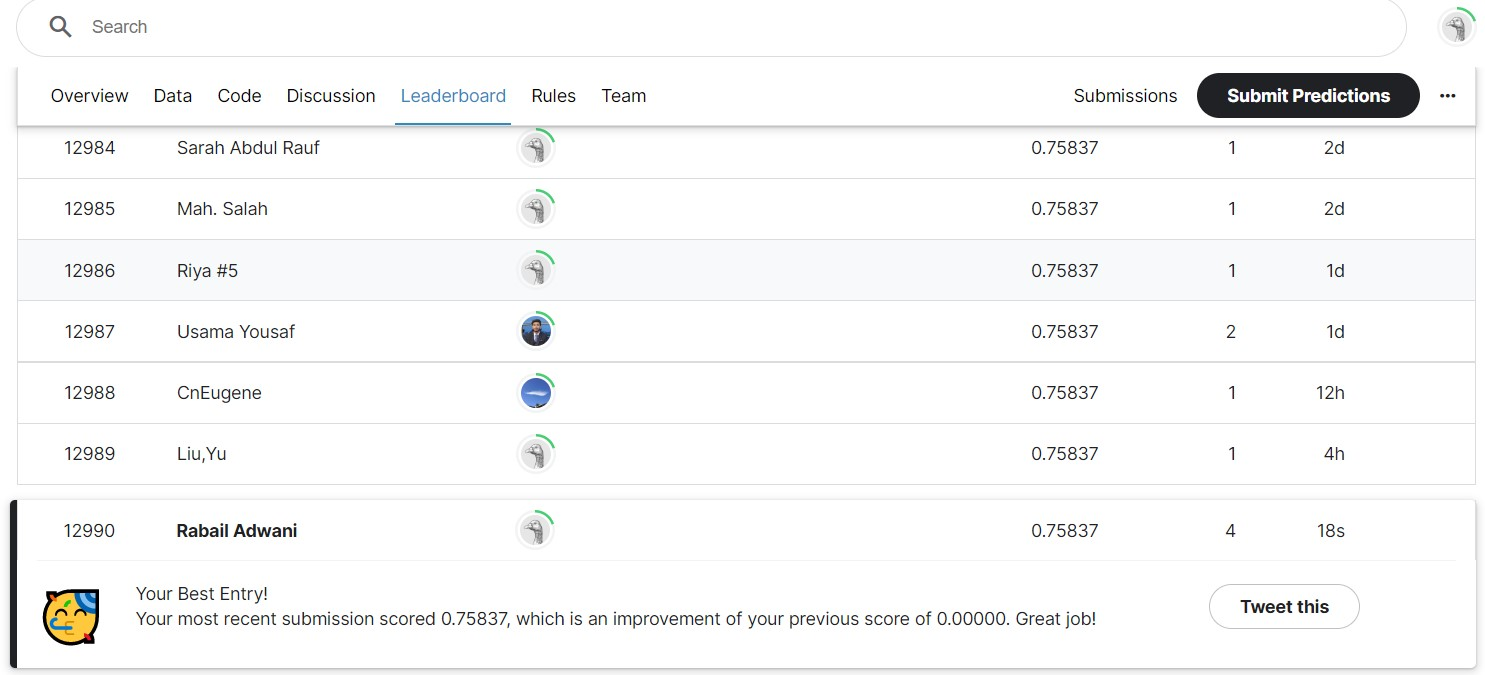

We achieved an accuracy of 75.837% using Logistic Regression predicitng passenger survivorship on Titantic. In comparison with other Kagglers, the model stands at a rank of 12990 on the leaderboard which is low. The accuracy rate for the predictions can be improved by trying different models to find the best algorithm  and tuning hyperparameters. We can also use cross-validation technique to avoid overfitting. Additionally, we can also use ensemble learning methods to combine multiple models for better performance.

# Random Forest (Model 2)

In [258]:
# # Random Forest
# RFC = RandomForestClassifier()

# # Grid Search to find best hyperparameters (Commented out grid search because it requires time to run)
# n_estimators = [500, 1000] # Number of trees in random forest
# max_depth = [4, 7, None] # Maximum number of levels in tree
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# param_grid = {"n_estimators": n_estimators,
#              "max_depth": max_depth,
#              "min_samples_split": min_samples_split,
#              "min_samples_leaf": min_samples_leaf}

#grid_cv_RFC = GridSearchCV(RFC, param_grid, cv = 3)
#grid_cv_RFC.fit(X_train,y_train)

#print("Acc ::{}".format(grid_cv_RFC.best_score_))
#print("Best Hyperparameters::\n{}".format(grid_cv_RFC.best_params_))

In [259]:
model = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, max_depth = 7, min_samples_leaf = 1, random_state = 123)
model.fit(X_train,y_train)

# store the predictions
train_preds_RFC = model.predict(X_train) 
test_preds_RFC = model.predict(X_test)

In [260]:
# actual vs predicted (train) - Random Forest
trainResults_RFC = classification_report(y_train, train_preds_RFC) # (actual, predicted)
print(trainResults_RFC)
print(confusion_matrix(y_train, train_preds_RFC))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       435
         1.0       0.91      0.79      0.85       277

    accuracy                           0.89       712
   macro avg       0.89      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712

[[413  22]
 [ 57 220]]


In [261]:
print("train_mae:", mean_absolute_error(y_train, train_preds_RFC))

train_mae: 0.11095505617977527


In [262]:
# actual vs predicted (test) - Random Forest
testResults_RFC = classification_report(y_test, test_preds_RFC)
print(testResults_RFC)
print(confusion_matrix(y_test, test_preds_RFC))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       114
         1.0       0.84      0.78      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179

[[104  10]
 [ 14  51]]


In [263]:
print("test_mae:", mean_absolute_error(y_test, test_preds_RFC))

test_mae: 0.1340782122905028


In [264]:
# Preparing a file for submission - Random Forest
predictions2 = model.predict(tmp)

output2 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions2.astype('int')})
output2.to_csv('submission2.csv', index = False)

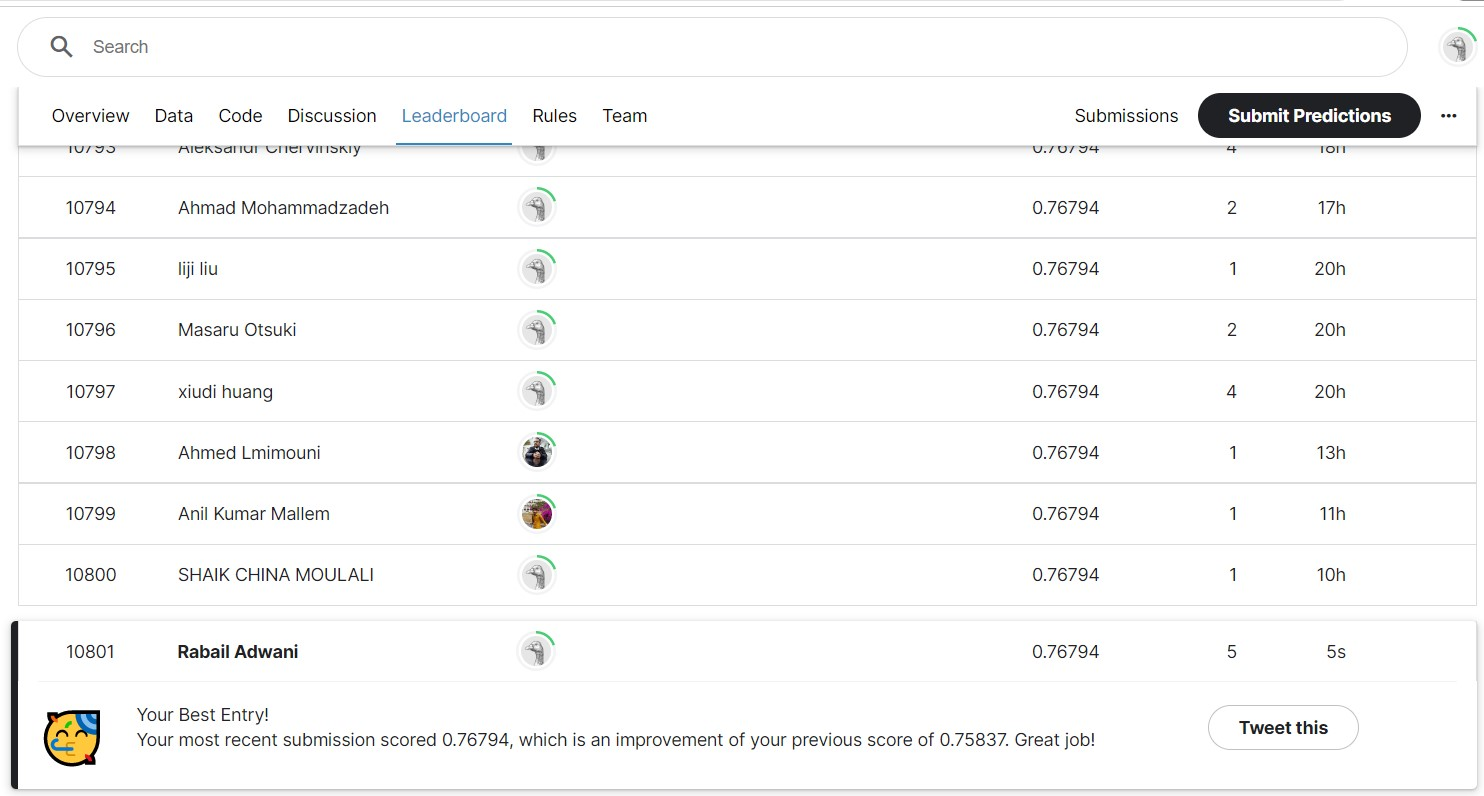

This has actually worked to some extent. The accuracy rate slightly increased from 75.837% to 76.794%. This is mainly due to hyperparameter tuning and using an ensemble learning method like Random Forest. We can further improve this by finding the best hyperparameters using Grid Search but it may take higher computing time.

# Gradient Boosting (Model 3)

In [265]:
# # Gradient Boosting
# GBC = GradientBoostingClassifier()

# # Grid Search to find best hyperparameters (Commented out grid search because it requires time to run)
# n_estimators = [1000, 2000] # Number of trees in random forest
# max_depth = [4, 7, None] # Maximum number of levels in tree
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]

# param_grid = {"n_estimators": n_estimators,
#              "max_depth": max_depth,
#              "min_samples_split": min_samples_split,
#              "min_samples_leaf": min_samples_leaf}

# grid_cv_GBC = GridSearchCV(GBC, param_grid, cv=5)
# grid_cv_GBC.fit(X_train,y_train)

# print("Accuracy::{}".format(grid_cv_GBC.best_score_))
# print("Best Hyperparameters::\n{}".format(grid_cv_GBC.best_params_))

In [266]:
model_GBC = GradientBoostingClassifier(n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 2, max_depth = 7, random_state = 123)

model_GBC.fit(X_train,y_train)

# store the predictions
train_preds_GBC = model_GBC.predict(X_train) 
test_preds_GBC = model_GBC.predict(X_test)

In [267]:
# actual vs predicted (train) - Gradient Boosting
trainResults_GBC = classification_report(y_train, train_preds_GBC) # (actual, predicted)
print(trainResults_GBC)
print(confusion_matrix(y_train, train_preds_GBC))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       435
         1.0       0.97      0.91      0.94       277

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.96      0.96      0.96       712

[[428   7]
 [ 24 253]]


In [268]:
print("train_mae:", mean_absolute_error(y_train, train_preds_GBC))

train_mae: 0.04353932584269663


In [269]:
# actual vs predicted (test) - Gradient Boosting
testResults_GBC = classification_report(y_test, test_preds_GBC)
print(testResults_GBC)
print(confusion_matrix(y_test, test_preds_GBC))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       114
         1.0       0.77      0.72      0.75        65

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[100  14]
 [ 18  47]]


In [270]:
print("test_mae:", mean_absolute_error(y_test, test_preds_GBC))

test_mae: 0.1787709497206704


In [271]:
# Preparing a file for submission - Gradient Boosting
predictions3 = model_GBC.predict(tmp)

output3 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions3.astype('int')})
output3.to_csv('submission3.csv', index = False)

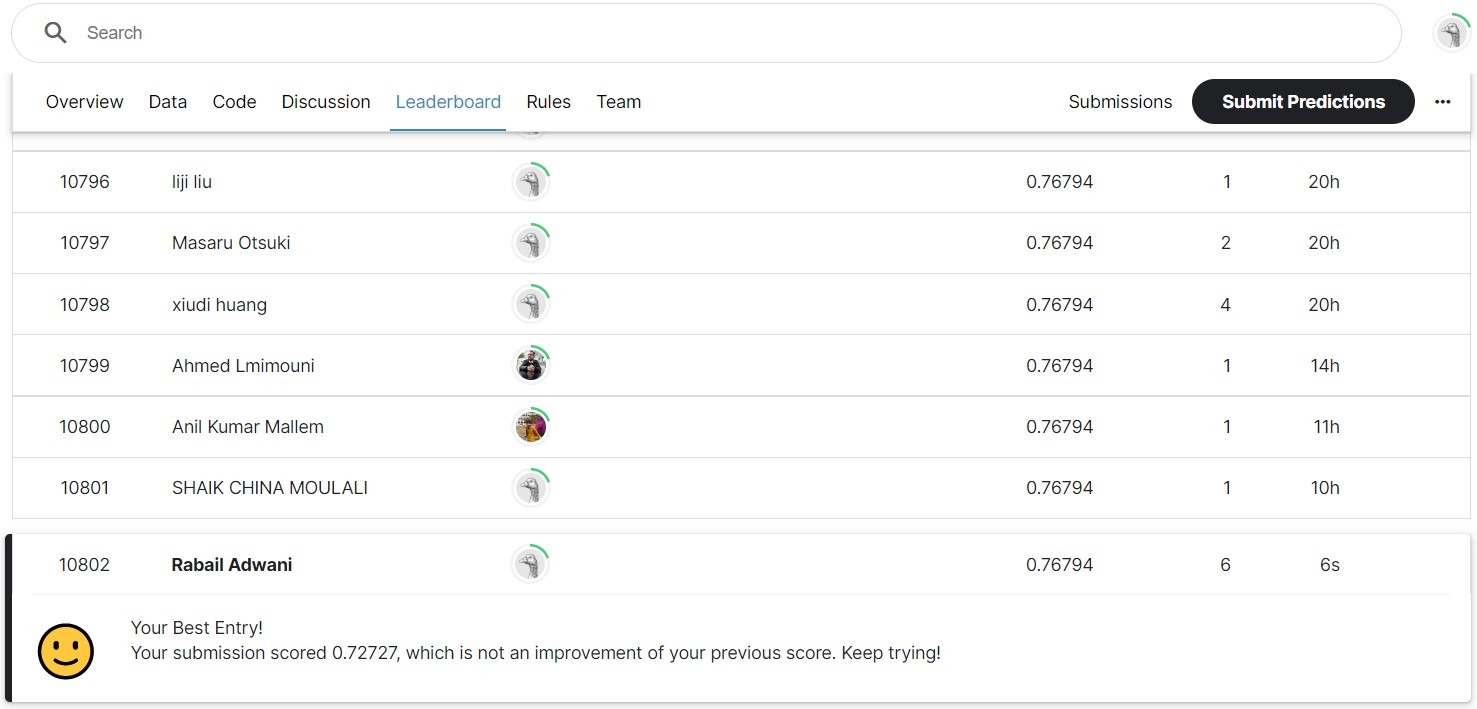

Overfitting is one of the weaknesses of a Gradient Boosting algorithm. We can clearly see that it performs significantly well on the training set (with over 90% accuracy) and worse on the test dataset. It is harder to train Gradient Boosting model than 
Random Forest because a poor choice of number of trees, depth of trees, and learning rate can easily underfit or overfit the model.